Computational Linguistics &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <br>Biao Yun

<center> 

# Basic Neural Network Assignment
### 2023.03.26

</center>

#### ÂºïÂÖ•ÊâÄÈúÄ packages

In [1]:
from keras.preprocessing.text import Tokenizer
from nltk.util import bigrams
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Reshape
from keras.callbacks import Callback,ModelCheckpoint
import keras.backend as K
import pandas as pd
from keras.preprocessing.text import one_hot
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from ckiptagger import data_utils
import matplotlib.pyplot as plt

## (1) Run the word-word sequence langugage model again, and print out the f-score. (20%)

* ËÆÄÂÖ•Ëã±ÊñáÊ™îÊ°àÔºåÊ≠§Ê™îÊ°àÁÇ∫ËÄÅÂ∏´ÁöÑÁ§∫ÁØÑÊ™îÊ°àÔºåÈÄôÈÇäÂºïÂÖ•ÂÜçË∑ë‰∏ÄÊ¨°ÂêåÊ®£ÁöÑÊµÅÁ®ãÔºåÂè™ÊòØÊèõÊàêÁî® f-score ‰æÜË©ï‰º∞Ê®°Âûã
* ‰ΩøÁî® Tokenizer Êñ∑Ë©û
* Ê≠§ÁÇ∫ word-word sequence modelÔºåÊïÖÁõÆÁöÑÁÇ∫È†êÊ∏¨‰∏ã‰∏ÄÂÄãÂ≠ó
* Âú® word to word sequence Ê®°Âûã‰∏≠ÔºåÊØèÂÄãÈ†êÊ∏¨ÁöÑÂ≠óÈÉΩÊòØ‰∏ÄÂÄãÁç®Á´ãÁöÑ‰∫ã‰ª∂ÔºåÂõ†Ê≠§ÂèØ‰ª•ÊääÈ†êÊ∏¨ÊØèÂÄãÂ≠óÁöÑÈÅéÁ®ãÁúã‰Ωú‰∏ÄÂÄãÂ§öÈ°ûÂà•ÂàÜÈ°ûÂïèÈ°å„ÄÇÈÄôÁ®ÆÊÉÖÊ≥Å‰∏ãÂñÆÁç®Áúã accuracy ÂèØËÉΩ‰∏çÊòØÈÇ£È∫ºÁêÜÊÉ≥ÔºåÂõ†ÁÇ∫ accuracy ÁÑ°Ê≥ïÂèçÊò†‰∏çÂπ≥Ë°°È°ûÂà•‰πãÈñìÁöÑÊÄßËÉΩÂ∑ÆÁï∞„ÄÇ‰æãÂ¶ÇÔºåÂ¶ÇÊûú‰∏ÄÂÄãÈ°ûÂà•Âú® dataset ‰∏≠ÁöÑÂá∫ÁèæÈ†ªÁéáÂæàÈ´òÔºåËÄåÂè¶‰∏ÄÂÄãÈ°ûÂà•ÁöÑÂá∫ÁèæÈ†ªÁéáÂæà‰ΩéÔºåÈÇ£È∫ºÊ®°ÂûãÂèØËÉΩÊúÉÂÇæÂêëÊñºÂ∞áÈ†êÊ∏¨ÂàÜÈÖçÁµ¶Âá∫ÁèæÈ†ªÁéáÈ´òÁöÑÈ°ûÂà•ÔºåËÄå‰∏çÊòØÂ∞çÂÖ©ÂÄãÈ°ûÂà•Âπ≥Á≠âÂú∞ËÄÉÊÖÆ„ÄÇ‰∏çÈÅéÈÄôÈÇäÈÇÑÊòØ‰øùÁïô‰∫Ü accuracy ÁöÑÊàêÁ∏æÔºåÊèê‰æõÊõ¥Â§öÂèÉËÄÉË≥áË®ä
* Âõ†ÁÇ∫ keras Â•ó‰ª∂‰∏≠ÁöÑ metrics Ê≤íÊúâ f-score ÈÄôÂÄãË©ï‰º∞ÊñπÂºèÔºåÊâÄ‰ª•ÈúÄË¶ÅÂè¶Â§ñÂÆöÁæ©‰∏ÄÂÄãËá™Â∑±ÁöÑ f-score functionÔºåË®òÈåÑÂèÉÊï∏‰∏¶Ë®àÁÆó
* ÊØè‰∏ÄÂÄã epoch ÈÉΩÊúÉË®àÁÆóÁï∂Ê¨°ÁöÑ macro f-score ÂàÜÊï∏ÔºåÊúÄÂæå model evalute ÁöÑ accuracy Âíå f-score ÂâáÊòØÊâÄÊúâ epoch ÁöÑÂπ≥Âùá
* f-score ÊòØ precesion Âíå recall ÁöÑÂä†Ê¨äË™øÂíåÂπ≥ÂùáÊï∏„ÄÇÂÆÉÁµêÂêà‰∫Ü precesion Âíå recall ÁöÑÂÑ™ÈªûÔºåÂêåÊôÇËÄÉÊÖÆ‰∫Ü FP Âíå FNÔºå‰ª•Á∂úÂêàË©ï‰º∞Ê®°ÂûãÁöÑÊ∫ñÁ¢∫ÊÄß
* ‰ΩøÁî® macro accuracy Âíå macro f-score ÂâáÊòØÂõ†ÁÇ∫Áî® macro ÁöÑÊñπÂºèËÉΩÂ∞áÊâÄÊúâË≥áÊñôË¶ñÁÇ∫ÂêåÁ≠âÈáçË¶ÅÔºåÈÅøÂÖç‰∏çÂπ≥Ë°°ÁöÑÁãÄÊ≥ÅÔºåÂõ†Ê≠§Êõ¥ËÉΩÂÖ®Èù¢Âú∞Ë©ï‰º∞Ê®°ÂûãÁöÑÊÄßËÉΩ„ÄÇ
* relu activation function: ReLUÂú®Ê≠£ÂçÄÈñìÊôÇÔºåÂ∞éÊï∏ÂßãÁµÇÁÇ∫ 1ÔºåËÄå tanh ÁöÑÂ∞éÊï∏ÊúÄÂ§ßÂè™Êúâ 0.25ÔºåÂõ†Ê≠§ ReLU ËÉΩÂ§†Êõ¥Âø´Âú∞Êî∂ÊñÇÔºõReLU Ë®àÁÆóÈÄüÂ∫¶Êõ¥Âø´ÔºåÂõ†ÁÇ∫ ReLU Âè™ÈúÄÊØîËºÉËº∏ÂÖ•ÊòØÂê¶Â§ßÊñº0ÔºåËÄå tanh ÈúÄË¶ÅÈÄ≤Ë°åÊåáÊï∏Ë®àÁÆó„ÄÇ
* Áï´Âá∫ÊØèÊ¨°Ë®ìÁ∑¥ÁöÑÊàêÁ∏æÁãÄÊ≥ÅÔºå‰ª•‰æøÊõ¥Áõ¥ËßÄÁöÑ‰∫ÜËß£Ê®°ÂûãÊÄßËÉΩ

#### ËÆÄÂÖ•Ëã±ÊñáÊ™îÊ°à

In [2]:
data = """ Jack and Jill went up the hill\n
        To fetch a pail of water\n
        Jack fell down and broke his crown\n
        And Jill came tumbling after\n """

#### Ëã±ÊñáÊñ∑Ë©û„ÄÅË£Ω‰Ωú one-hot encodings

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]  # list within list

print(encoded)
print(tokenizer.word_index)

[2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 14, 15, 1, 16, 17, 18, 1, 3, 19, 20, 21]
{'and': 1, 'jack': 2, 'jill': 3, 'went': 4, 'up': 5, 'the': 6, 'hill': 7, 'to': 8, 'fetch': 9, 'a': 10, 'pail': 11, 'of': 12, 'water': 13, 'fell': 14, 'down': 15, 'broke': 16, 'his': 17, 'crown': 18, 'came': 19, 'tumbling': 20, 'after': 21}


#### Ë®àÁÆó vocabulary size ÂèäË£Ω‰Ωú bigrams

In [4]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 22


In [5]:
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
print(sequences)

Total Sequences: 24
[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 2], [2, 14], [14, 15], [15, 1], [1, 16], [16, 17], [17, 18], [18, 1], [1, 3], [3, 19], [19, 20], [20, 21]]


In [6]:
sequences = np.array(sequences)
context_word, next_word = sequences[:,0],sequences[:,1]
context_word, next_word

(array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1,
        16, 17, 18,  1,  3, 19, 20]),
 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16,
        17, 18,  1,  3, 19, 20, 21]))

In [7]:
next_word = to_categorical(next_word, num_classes=vocab_size)
next_word

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,

#### ÂÆöÁæ© f-score function

In [8]:
def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Âª∫ÊßãÊ®°ÂûãÔºåÂºïÂÖ•ÂÆöÁæ©Â•ΩÁöÑ f-score function ÂÅöË®àÁÆó

In [9]:
model = Sequential()  # initialize a sequence model
model.add(Embedding(vocab_size, 10, input_length=1)) # initialize a embedding for features with 10 output_dim
model.add(Reshape((10,)))
model.add(Dense(units=50, activation='relu')) # one hidden layer with 50 output dimensions
model.add(Dense(vocab_size, activation='softmax')) # output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score])

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             220       
_________________________________________________________________
reshape (Reshape)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                1122      
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
None


#### Ê®°ÂûãË®ìÁ∑¥ÔºåÂÖ± 50 ÂÄã epochsÔºåÂàóÂá∫ÊØèÊ¨°ÁöÑ accuracy Âíå f-score

In [10]:
# fit network
eng = model.fit(context_word, next_word, epochs=50, verbose=2)  # you can specify batch size here

Epoch 1/50
1/1 - 11s - loss: 3.0974 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 2/50
1/1 - 0s - loss: 3.0946 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 3/50
1/1 - 0s - loss: 3.0920 - accuracy: 0.0417 - f1_score: 0.0000e+00
Epoch 4/50
1/1 - 0s - loss: 3.0895 - accuracy: 0.0833 - f1_score: 0.0000e+00
Epoch 5/50
1/1 - 0s - loss: 3.0870 - accuracy: 0.0833 - f1_score: 0.0000e+00
Epoch 6/50
1/1 - 0s - loss: 3.0845 - accuracy: 0.1250 - f1_score: 0.0000e+00
Epoch 7/50
1/1 - 0s - loss: 3.0821 - accuracy: 0.1250 - f1_score: 0.0000e+00
Epoch 8/50
1/1 - 0s - loss: 3.0797 - accuracy: 0.1667 - f1_score: 0.0000e+00
Epoch 9/50
1/1 - 0s - loss: 3.0773 - accuracy: 0.1667 - f1_score: 0.0000e+00
Epoch 10/50
1/1 - 0s - loss: 3.0749 - accuracy: 0.1667 - f1_score: 0.0000e+00
Epoch 11/50
1/1 - 0s - loss: 3.0725 - accuracy: 0.1667 - f1_score: 0.0000e+00
Epoch 12/50
1/1 - 0s - loss: 3.0701 - accuracy: 0.1667 - f1_score: 0.0000e+00
Epoch 13/50
1/1 - 0s - loss: 3.0677 - accuracy: 0.1667 - f1_scor

#### Ê®°ÂûãÂπ≥ÂùáÁöÑ loss„ÄÅaccuracy Âíå f-score

In [11]:
loss, accuracy, f1_score = model.evaluate(context_word, next_word, verbose=2)
print('Accuracy: %f' % (accuracy*100))
print('F1_score: %f' % (f1_score*100))
print('Loss: %d' % loss)

1/1 - 0s - loss: 2.9268 - accuracy: 0.3750 - f1_score: 0.0000e+00
Accuracy: 37.500000
F1_score: 0.000000
Loss: 2


#### Áï´Âá∫ÊØèÂÄã epoch ‰∏≠ accuracy„ÄÅf-score Âíå loss ÁöÑÊàêÁ∏æ

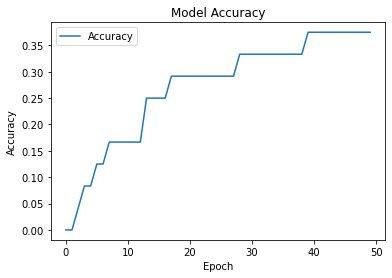

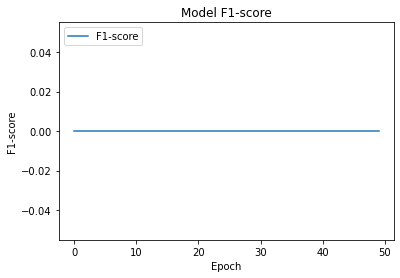

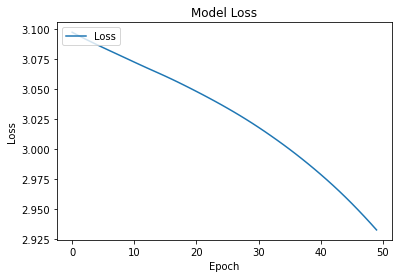

In [12]:


# plot accuracy
plt.plot(eng.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation'], loc='upper left')
plt.show()



# plot f1

plt.plot(eng.history['f1_score'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['F1-score', 'Validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(eng.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation'], loc='upper left')
plt.show()

#### ÂòóË©¶ËÆìÊ®°ÂûãÈ†êÊ∏¨‰∏ã‰∏ÄÂÄãÂ≠ó

In [13]:
in_text = 'fetch'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = np.argmax(model.predict(encoded), axis=-1)
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)

fetch
a


## Á¨¨‰∏ÄÈ°å Reflection

ÈÄôÈÇäÁôºÁèæÂõ†ÁÇ∫Ëã±ÊñáË≥áÊñôÂØ¶Âú®ÊòØÂ§™Â∞è‰∫ÜÔºåÊâÄ‰ª•ÊèõÊàê f-score Ë©ï‰º∞ÊôÇÊ†πÊú¨Ê≤íÊúâÁî®ÔºåÊï∏ÂÄºÊé•Ëøë 0„ÄÇÈõñÁÑ∂ËßÄÂØüÊØèÊ¨° epoch ÁöÑÁµêÊûúËÉΩÁôºÁèæ accuracy ÊúâÊâÄÂ¢ûÈï∑ÔºåÂú® 40 Ê¨° epoch ‰πãÂæåÂèà‰∏äÂçá‰∫Ü‰∏Ä‰∫õ‰∏îÈÅîÂà∞Á©©ÂÆöÔºåloss ‰πüÊÖ¢ÊÖ¢‰∏ãÈôçÔºå‰∏çÈÅéÂèØËÉΩÊòØË≥áÊñôÂ§™Â∞ëÔºå‰∏çÂêåÈ°ûÂà•ÁöÑÊ®£Êú¨Êï∏ÈáèÈÅéÂ∞ëÔºåÊ®°ÂûãÈ†êÊ∏¨ËÉΩÂäõÂ∑ÆÔºå‰ª•Ëá¥ÊñºËÄÉÊÖÆÊõ¥Âä†ÂÖ®Èù¢ÁöÑ f-score Ê≤íÊúâË∂≥Â§†ÁöÑË≥áÊñô‰æÜË©ï‰º∞Ê®°ÂûãÔºàprecision Âíå recall ÈÉΩÂæà‰ΩéÔºâÔºå‰ΩøÊúÄÂæå f-score ÂëàÁèæÊé•Ëøë 0 ÁöÑÊÉÖÊ≥Å„ÄÇ

## (2) Play around with the Chinese dataset yourself. Train a word-word or line-line sequence language model with 80% training set and 20% test set. (40%)

* ËÆÄÂÖ•‰∏≠ÊñáÊñá‰ª∂
* Ê≠§Ê™îÊ°àËàá‰∏äÈÄ±Ê™îÊ°àÁõ∏ÂêåÔºåÁÇ∫ËèØË™ûÁî∑Ê≠åÊâã 2013-2023 ‰πãÈñìÁôºÂ∏É‰πãÊ≠åÊõ≤Ê≠åË©ûÔºåÂåÖÂê´Ê≠åÊâã„ÄÅÊ≠åÂêç„ÄÅÊ≠åË©û„ÄÅÁ∂≤ÂùÄËàáÊó•ÊúüÁ≠âÊ¨Ñ‰ΩçÔºåÁî±È≠îÈè°Ê≠åË©ûÁ∂≤ÂèñÂæó
* Áî±Êñº‰∏äÈÄ±Â∑≤Á∂ìÂÑ≤Â≠òÂ•ΩÊ∏ÖÁêÜ‰ª•ÂèäÊñ∑Ë©ûÂÆåÁöÑÊ¨Ñ‰Ωç`segmented_lyricsÔºâ`ÔºåÊâÄ‰ª•ÈÄôÊ¨°ÊúÉÁõ¥Êé•ÂèñÁî®Ê≠§Ê¨Ñ‰ΩçÁöÑË≥áÊñô‰æÜÂÅö word-to-word sequence Ê®°Âûã
* Âõ†ÁÇ∫ÊòØ word-to-word sequence Ê®°ÂûãÔºåÂ≠óÊï∏Â§™Â§öÂ∞éËá¥ÊàëÁöÑ kernel ÁÑ°Ê≥ïË≤†Ëç∑ÔºåÊïÖÊúÄÁµÇÂÉÖÂæûÂéüÊ™îÊ°àÂèñÂá∫ 200 È¶ñÊ≠åÁöÑÊ≠åË©û‰ΩúÁÇ∫Ê≠§Ê¨°Ê®°ÂûãË®ìÁ∑¥Ë≥áÊñô
* Ê®°ÂûãÁõÆÁöÑÁÇ∫È†êÊ∏¨‰∏ã‰∏ÄÂÄãÂ≠óÊòØ‰ªÄÈ∫º
* Â∞áË≥áÊñô shuffle ‰πãÂæåÂàÜÊàê training and test setÔºåÁ¢∫‰øùË≥áÊñôÊòØÊâìÊï£ÁöÑÁãÄÊÖã

#### ËÆÄÂÖ•‰∏≠ÊñáÊñá‰ª∂

In [14]:

df_clean = pd.read_csv('/Users/biaoyun/Documents/111 Spring Semester Gtaduated Institute/Week_5/df_clean.csv', sep = '\t')
df_clean = df_clean.iloc[4225:4425]


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 4225 to 4424
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   singer            200 non-null    object
 1   name              200 non-null    object
 2   lyric             200 non-null    object
 3   song_url          200 non-null    object
 4   date              200 non-null    object
 5   sentiment         200 non-null    int64 
 6   segmented_lyrics  200 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.1+ KB


#### ÈÅ∏Âèñ `segmented_lyrics` Ê¨Ñ‰Ωç‰ΩúÁÇ∫Ë®ìÁ∑¥Ë≥áÊñô

In [16]:
docs = list(df_clean['segmented_lyrics'])
docs_strings = ' '.join(docs)


#### Ë£Ω‰Ωú one-hot encodings

In [17]:
tokenizer_zh = Tokenizer()
tokenizer_zh.fit_on_texts([docs_strings])
encoded_zh = tokenizer_zh.texts_to_sequences([docs_strings])[0]  # list within list

encoded_zh
tokenizer_zh.word_index

{'ÁöÑ': 1,
 'Êàë': 2,
 '‰Ω†': 3,
 '‰∏Ä': 4,
 '‰∏ç': 5,
 'ÊòØ': 6,
 'Êúâ': 7,
 'Âú®': 8,
 'ÊÑõ': 9,
 'Ëëó': 10,
 '‰∫Ü': 11,
 'ÊúÉ': 12,
 '‰πü': 13,
 'ÈÄô': 14,
 'Â¶≥': 15,
 'Â∞±': 16,
 '‰∫∫': 17,
 'ÈÉΩ': 18,
 'ÂÄã': 19,
 'Ë¶Å': 20,
 '‰ΩúË©û': 21,
 'ÈÇ£': 22,
 'Âïä': 23,
 'ÈÇÑ': 24,
 'ÊÉ≥': 25,
 '‰ΩúÊõ≤': 26,
 'Ê≤í': 27,
 'ÂøÉ': 28,
 'ÂÆÖÂÆÖ': 29,
 'ËÆì': 30,
 'ÈÅé': 31,
 'Âéª': 32,
 'Ë™™': 33,
 'ÂÜç': 34,
 'Âà•': 35,
 '‰∏ñÁïå': 36,
 '‰æÜ': 37,
 'ÁÇ∫': 38,
 'Â§©': 39,
 'Ë™∞': 40,
 'Áúã': 41,
 'ÊàëÂÄë': 42,
 'ÊÑüË¨ù': 43,
 '‰∏≠': 44,
 'Âèà': 45,
 'ÊØè': 46,
 '‰ªñ': 47,
 'Â§¢': 48,
 'Âè™': 49,
 'ÁÑ°': 50,
 'Â§ö': 51,
 'Ëµ∞': 52,
 'Â•Ω': 53,
 'Âú∞': 54,
 'Ë£°': 55,
 '‰ªÄÈ∫º': 56,
 'Ë¢´': 57,
 'Â∞ç': 58,
 'Ëá™Â∑±': 59,
 'Á∑®Êõ≤': 60,
 'ËÉΩ': 61,
 'ËçíÂ±±‰∫Æ': 62,
 'Â∞á': 63,
 '‰∏ä': 64,
 'Ê≤íÊúâ': 65,
 'Âçª': 66,
 'Ëàá': 67,
 'Âêß': 68,
 'Ëã•': 69,
 'Áî®': 70,
 'Ê≠åË©û': 71,
 'Âà∞': 72,
 'Áï∂': 73,
 'ËèØÊô®ÂÆá': 74,
 'Âíå': 75,
 'ÂÉè': 76,
 'Ê≠•': 77,
 'ÊâÄÊúâ': 78,
 'Á¨ë': 79,
 'Ê∞∏ÈÅ†': 80

#### Ë®àÁÆó vocabulary size ‰∏¶Ë£Ω‰Ωú bigrams

In [18]:
vocab_size_zh = len(tokenizer_zh.word_index) + 1
print('Vocabulary Size: %d' % vocab_size_zh)

Vocabulary Size: 6636


In [19]:
sequences_zh = list(bigrams(encoded_zh))
sequences_zh

[(21, 4043),
 (4043, 4044),
 (4044, 26),
 (26, 4045),
 (4045, 1415),
 (1415, 2394),
 (2394, 13),
 (13, 108),
 (108, 1850),
 (1850, 376),
 (376, 1851),
 (1851, 2395),
 (2395, 727),
 (727, 105),
 (105, 51),
 (51, 2396),
 (2396, 376),
 (376, 847),
 (847, 6),
 (6, 2397),
 (2397, 5),
 (5, 640),
 (640, 2398),
 (2398, 2399),
 (2399, 2400),
 (2400, 358),
 (358, 48),
 (48, 4),
 (4, 113),
 (113, 533),
 (533, 2401),
 (2401, 641),
 (641, 52),
 (52, 1416),
 (1416, 376),
 (376, 109),
 (109, 1205),
 (1205, 52),
 (52, 1415),
 (1415, 441),
 (441, 2402),
 (2402, 2403),
 (2403, 4),
 (4, 77),
 (77, 4),
 (4, 231),
 (231, 2404),
 (2404, 728),
 (728, 1852),
 (1852, 2405),
 (2405, 182),
 (182, 729),
 (729, 2406),
 (2406, 7),
 (7, 17),
 (17, 67),
 (67, 15),
 (15, 2407),
 (2407, 848),
 (848, 7),
 (7, 17),
 (17, 442),
 (442, 15),
 (15, 2408),
 (2408, 92),
 (92, 2409),
 (2409, 7),
 (7, 17),
 (17, 67),
 (67, 15),
 (15, 2410),
 (2410, 2411),
 (2411, 7),
 (7, 17),
 (17, 321),
 (321, 15),
 (15, 1417),
 (1417, 1418),


In [20]:
sequences_zh = np.array(sequences_zh)
context_word_zh, next_word_zh = sequences_zh[:,0],sequences_zh[:,1]
context_word_zh, next_word_zh

(array([  21, 4043, 4044, ...,    3,   43,  112]),
 array([4043, 4044,   26, ...,   43,  112,   71]))

In [21]:
next_word_zh = to_categorical(next_word_zh, num_classes=vocab_size_zh)
next_word_zh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Â∞áË≥áÊñô shuffle ‰∏¶ÂàÜÊàê training and test sets

In [22]:


shuffled_contex, shuffled_next = shuffle(context_word_zh, next_word_zh, random_state = 888)
contex_train, contex_test, next_train, next_test = train_test_split(shuffled_contex, shuffled_next, test_size = 0.2, random_state = 413)




#### ÂÆöÁæ© f-score functionÔºà‰∏çÁü•ÈÅìÁÇ∫‰ªÄÈ∫ºÔºåÂ¶ÇÊûúÊàëÊ≤íÊúâÂú®ÈÄôË£°ÈáçÊñ∞ÂÆöÁæ©‰∏ÄÊ¨°ÔºåÊ®°ÂûãÂ∞±ÊúÉÂ£ûÊéâ......Ôºâ

In [23]:
def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Âª∫ÊßãÊ®°Âûã

In [24]:
model_zh = Sequential()  # initialize a sequence model
model_zh.add(Embedding(vocab_size_zh, 10, input_length=1)) # initialize a embedding for features with 10 output_dim
model_zh.add(Reshape((10,)))
model_zh.add(Dense(units=50, activation='relu')) # one hidden layer with 50 output dimensions
model_zh.add(Dense(vocab_size_zh, activation='softmax')) # output layer

model_zh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score])

print(model_zh.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             66360     
_________________________________________________________________
reshape_1 (Reshape)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 6636)              338436    
Total params: 405,346
Trainable params: 405,346
Non-trainable params: 0
_________________________________________________________________
None


## Á¨¨‰∫åÈ°å Reflection

ÈÄôÈÇäÊàëÁôºÁèæÁî®ÊàëÂéüÊú¨ÁöÑÊ™îÊ°àÔºàvocabulary size 4 Ëê¨Â§öÔºâÔºåÂú®ÂàÜ training and test sets ÈÇ£ÈÇäÊï¥ÂÄã kernel Â∞±ÊúÉËá™ÂãïÁµêÊùüÔºåÁ∂ìÈÅéÂèçË¶ÜÊ∏¨Ë©¶‰πãÂæåÁôºÁèæÁ¥Ñ 2 Ëê¨Â≠óÊòØÈõªËÖ¶ÁöÑÊ•µÈôêÔºà‰πüÂèØËÉΩÊòØÊàëÁöÑÈõªËÖ¶Â§™Áàõ‰∫ÜÔºåÊ≤íÊúâË∂≥Â§†ÁöÑË®òÊÜ∂È´îüò£Ôºâ„ÄÇ

## (3) Print out the predicted Chinese result and evaluate with f-score. (20%)

* ÈÄ≤Ë°åÊ®°ÂûãË®ìÁ∑¥
* Ë®≠ÂÆö 100 ÂÄã epochs
* ‰ΩøÁî® f-score Ë©ï‰º∞Ê®°ÂûãÔºåÂéüÂõ†ËàáÁ¨¨‰∏ÄÈ°åÁõ∏ÂêåÔºàÂêåÊôÇ‰øùÁïô accuracy ÁöÑË≥áË®äÔºâ
* ÁÆóÂá∫ 100 ÂÄã epochs ÂæåÁöÑÊàêÁ∏æÂπ≥Âùá
* Áï´Âá∫ÊØèÊ¨°Ë®ìÁ∑¥Ê®°ÂûãÁöÑÊàêÁ∏æË°®Áèæ

#### Ê®°ÂûãË®ìÁ∑¥Ôºåepochs = 100

In [25]:
zh = model_zh.fit(contex_train, next_train, epochs= 100, verbose=2)

Epoch 1/100
1103/1103 - 7s - loss: 7.4372 - accuracy: 0.0524 - f1_score: 0.0000e+00
Epoch 2/100
1103/1103 - 8s - loss: 6.8931 - accuracy: 0.0537 - f1_score: 0.0000e+00
Epoch 3/100
1103/1103 - 8s - loss: 6.6479 - accuracy: 0.0722 - f1_score: 0.0052
Epoch 4/100
1103/1103 - 9s - loss: 6.3565 - accuracy: 0.0939 - f1_score: 0.0186
Epoch 5/100
1103/1103 - 8s - loss: 6.0408 - accuracy: 0.1200 - f1_score: 0.0397
Epoch 6/100
1103/1103 - 8s - loss: 5.7091 - accuracy: 0.1458 - f1_score: 0.0610
Epoch 7/100
1103/1103 - 8s - loss: 5.3794 - accuracy: 0.1736 - f1_score: 0.0870
Epoch 8/100
1103/1103 - 7s - loss: 5.0566 - accuracy: 0.1986 - f1_score: 0.1158
Epoch 9/100
1103/1103 - 7s - loss: 4.7511 - accuracy: 0.2222 - f1_score: 0.1471
Epoch 10/100
1103/1103 - 7s - loss: 4.4794 - accuracy: 0.2466 - f1_score: 0.1737
Epoch 11/100
1103/1103 - 8s - loss: 4.2434 - accuracy: 0.2664 - f1_score: 0.1976
Epoch 12/100
1103/1103 - 8s - loss: 4.0415 - accuracy: 0.2832 - f1_score: 0.2187
Epoch 13/100
1103/1103 - 9s -

#### Ë®àÁÆóÂπ≥ÂùáÊàêÁ∏æ

In [26]:
loss_zh, accuracy_zh, f1_score_zh = model_zh.evaluate(contex_test, next_test, verbose=2)
print('Accuracy: %f' % (accuracy_zh*100))
print('F1_score: %f' % (f1_score_zh*100))
print('Loss: %d' % loss_zh)

276/276 - 2s - loss: 11.4080 - accuracy: 0.2468 - f1_score: 0.2333
Accuracy: 24.676797
F1_score: 23.328128
Loss: 11


#### Áï´Âá∫Ê®°ÂûãÊØèÂÄã epoch ÁöÑ accuracy„ÄÅf-score Ëàá loss

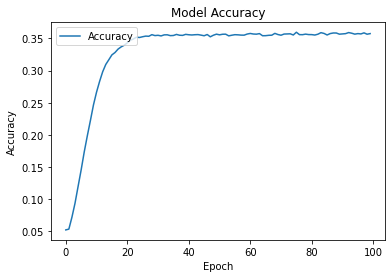

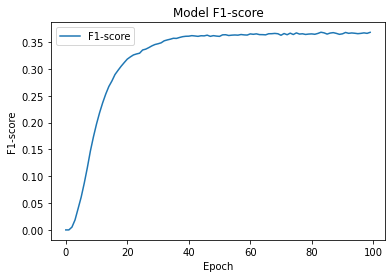

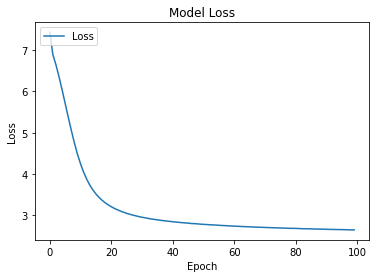

In [27]:


# plot accuracy
plt.plot(zh.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation'], loc='upper left')
plt.show()



# plot f1

plt.plot(zh.history['f1_score'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['F1-score', 'Validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(zh.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation'], loc='upper left')
plt.show()

#### ËÆìÊ®°ÂûãÈ†êÊ∏¨‰∏ã‰∏ÄÂÄãÂ≠ó

In [28]:
in_text = 'Êàë'
print(in_text)
encoded_zh_test = tokenizer_zh.texts_to_sequences([in_text])[0]
encoded_zh_test = np.array(encoded_zh_test)
yhat_zh = np.argmax(model_zh.predict(encoded_zh_test), axis=-1)
for word, index in tokenizer_zh.word_index.items():
    if index == yhat_zh:
        print(word)

Êàë
ÁöÑ


## Á¨¨‰∏âÈ°å Reflection

ÊàëÂéüÊú¨Áî®‰∫Ü vocabulary size Á¥Ñ 2 Ëê¨ÁöÑË≥áÊñôÈáèÂéªË®ìÁ∑¥ÔºåË®ìÁ∑¥ÁµêÊûúÈùûÂ∏∏‰∏çÂ•ΩÔºåÊâÄ‰ª•ÊàëÂèàÂòóË©¶‰∫ÜÂêÑÁ®Æ‰∏çÂêåÈ°ûÂûãÁöÑÊñáÊú¨ÂéªË®ìÁ∑¥Ôºå‰ª•ÁÇ∫ÊñáÊú¨ÊáâË©≤Ë¶ÅÊòØÂêå‰∏ÄÁØáÊñáÁ´†ÔºåÊúâÈÄ£Ë≤´ÊÄßÔºåËÄåÈùû‰∏ÄÁØá‰∏ÄÁØáÁöÑÊ≠åË©ûÔºåË®ìÁ∑¥ÁµêÊûúÊâçÊúÉÊØîËºÉÂ•Ω„ÄÇÁ∂ìÈÅéÂ§öÊ¨°Ê∏¨Ë©¶ÔºåÊúÄÁµÇÁôºÁèæ vocabulary size ÁöÑÂΩ±ÈüøÊáâË©≤ÊòØÊúÄÂ§ßÁöÑÔºåÂú® 600 Â∑¶Âè≥ÊôÇÁÑ°Ë´ñÊòØ accuracy ÈÇÑÊòØ f-score ÊàêÁ∏æÈÉΩÂæà‰∏çÈåØÔºåÁÑ∂ËÄåÂ¢ûÂä†Âà∞ 2000 Â∑¶Âè≥ÁöÑÊôÇÂÄôÂ∞±ÈñãÂßãÁàõÊéâ‰∫ÜÔºàÊàëÈÄôÈÇäÊúÄÂæåÈÇÑÊòØÁî®‰∫Ü 6636 ÂÄãÂ≠óÔºåÂõ†ÁÇ∫ÂÖ∂ÂØ¶Ê≤íËæ¶Ê≥ïÂæàÁ¢∫ÂÆöÂà∞Â∫ïÊòØ‰ªÄÈ∫ºÂéüÂõ†Ôºâ„ÄÇÈõñÁÑ∂‰πü‰∏çÊéíÈô§Â∞èÊñáÊú¨ÁöÑÊ®°ÂûãÊúâ overfitting ÁöÑÂ´åÁñëÔºå‰ΩÜÊàëÈÇÑÊòØÂª∫Ë≠∞Â¶ÇÊûúÊÉ≥Ë¶ÅË®ìÁ∑¥Êõ¥Â§öÊù±Ë•øÔºåË§áÈõú‰∏ÄÈªûÁöÑÊ®°ÂûãÈÇÑÊòØÂøÖÈ†àÁöÑüòÇ

Âè¶Â§ñÔºåÂ∞çÊØîËã±ÊñáÁâàÁöÑË∂ÖÂ∞è data ÊúÉÁôºÁèæÔºåË≥áÊñôÈÇÑÊòØË¶ÅÊúâ‰∏ÄÂÆöÁöÑÂ§ßÂ∞èËàáÂ§öÊ¨°ÁöÑ epochs ÊâçËÉΩÂ§†ÁúãÂá∫Ë∂®Âã¢ÔºåÂåÖÊã¨Âú®Á¥Ñ 50 ÂÄã epochs ÂæåÁ©©ÂÆö‰∏äÂçáÁöÑ accuracy Âíå f-score ‰ª•ÂèäÁ©©ÂÆö‰∏ãÈôçÁöÑ loss

## (4) Play around with batch size, and try to add a hidden layer with 50 units without using `Dense()`. Write out your notes or comments. (20%)

* batch size ÁÇ∫ 64
* Âõ†ÁÇ∫È°åÁõÆË¶èÂÆö‰∏çËÉΩ‰ΩøÁî® `Dense()` ‰ΩúÁÇ∫Èö±ËóèÂ±§‰æÜÊ∑ªÂä†Á•ûÁ∂ìÂÖÉÔºåÊâÄ‰ª•ÈÄôÈÇäÊ±∫ÂÆöÊé°Áî® LSTM ÂÅöÈö±ËóèÂ±§ÔºåÂõ†ÁÇ∫ÂÆÉÂÖßÈÉ®‰πüÂèØ‰ª•Ë®≠ÂÆöÊ∑ªÂä†Á•ûÁ∂ìÂÖÉ„ÄÇ
* ÈÅ∏Êìá LSTM ÊòØÂõ†ÁÇ∫ÈÄôÁ®ÆÁµêÊßãÂÖÅË®±Á•ûÁ∂ìÁ∂≤Ë∑Ø„ÄåË®ò‰Ωè„ÄçÂÖàÂâçËôïÁêÜÈÅéÁöÑÊï∏ÊìöÔºå‰∏¶Ê†πÊìö‰∏ä‰∏ãÊñáË®äÊÅØËá™ÈÅ©ÊáâÂú∞Êõ¥Êñ∞Èö±ËóèÁãÄÊÖãÔºå‰∏îÁêÜË´ñ‰∏ä LSTM Â±§Êõ¥ÈÅ©ÂêàËôïÁêÜÂ∫èÂàó data„ÄÇ
* Ê®°ÂûãË©ï‰º∞ÔºåÊñπÂºèËàáÂâç‰∏ÄÈ°å‰∏ÄÊ®£
* Áπ™Ë£ΩÊØèÂÄã epoch ÁöÑË°®Áèæ

#### Âª∫ÊßãÊ®°Âûã

In [29]:
model_zh_new = Sequential()  # initialize a sequence model
model_zh_new.add(Embedding(vocab_size_zh, 10, input_length=1)) # initialize a embedding for features with 10 output_dim
#model_zh_new.add(Reshape((10,)))
model_zh_new.add(LSTM(50, activation='relu')) # one hidden layer with 50 output dimensions
model_zh_new.add(Dense(vocab_size_zh, activation='softmax')) # output layer
model_zh_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score])

print(model_zh_new.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 10)             66360     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense_4 (Dense)              (None, 6636)              338436    
Total params: 416,996
Trainable params: 416,996
Non-trainable params: 0
_________________________________________________________________
None


#### Ë®≠ÂÆö batch_size = 32

In [30]:
zh_new = model_zh_new.fit(contex_train, next_train, batch_size= 32, epochs= 100, verbose=2)

Epoch 1/100
1103/1103 - 16s - loss: 7.5201 - accuracy: 0.0524 - f1_score: 0.0000e+00
Epoch 2/100
1103/1103 - 8s - loss: 6.9595 - accuracy: 0.0528 - f1_score: 0.0000e+00
Epoch 3/100
1103/1103 - 8s - loss: 6.8715 - accuracy: 0.0528 - f1_score: 4.9452e-04
Epoch 4/100
1103/1103 - 8s - loss: 6.8163 - accuracy: 0.0528 - f1_score: 0.0020
Epoch 5/100
1103/1103 - 8s - loss: 6.7274 - accuracy: 0.0553 - f1_score: 0.0053
Epoch 6/100
1103/1103 - 8s - loss: 6.5886 - accuracy: 0.0693 - f1_score: 0.0175
Epoch 7/100
1103/1103 - 8s - loss: 6.4386 - accuracy: 0.0841 - f1_score: 0.0241
Epoch 8/100
1103/1103 - 9s - loss: 6.2817 - accuracy: 0.0952 - f1_score: 0.0348
Epoch 9/100
1103/1103 - 10s - loss: 6.0915 - accuracy: 0.1084 - f1_score: 0.0461
Epoch 10/100
1103/1103 - 8s - loss: 5.8283 - accuracy: 0.1349 - f1_score: 0.0645
Epoch 11/100
1103/1103 - 9s - loss: 5.5286 - accuracy: 0.1613 - f1_score: 0.0893
Epoch 12/100
1103/1103 - 11s - loss: 5.2455 - accuracy: 0.1807 - f1_score: 0.1127
Epoch 13/100
1103/1103

#### Ë®àÁÆóÂπ≥ÂùáÊàêÁ∏æ

In [31]:
loss_zh_new, accuracy_zh_new, f1_score_zh_new = model_zh_new.evaluate(contex_test, next_test, verbose=2, batch_size = 32)
print('Accuracy: %f' % (accuracy_zh_new*100))
print('F1_score: %f' % (f1_score_zh_new*100))
print('Loss: %d' % loss_zh_new)

276/276 - 4s - loss: 12.2037 - accuracy: 0.2527 - f1_score: 0.2389
Accuracy: 25.266501
F1_score: 23.892270
Loss: 12


#### Áπ™Ë£ΩÊØèÂÄã epoch ÁöÑÊàêÁ∏æË°®Áèæ

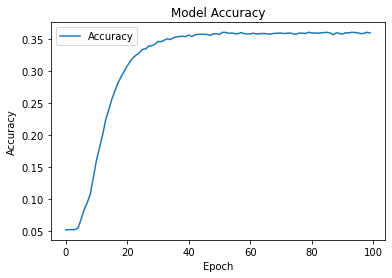

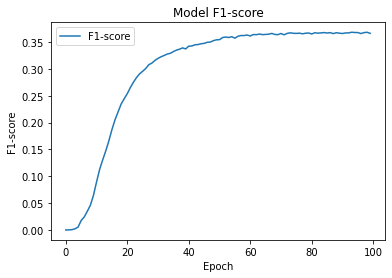

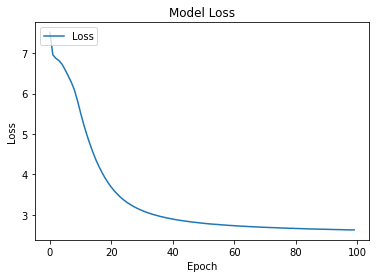

In [32]:
# import matplotlib.pyplot as plt


# plot accuracy
plt.plot(zh_new.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation'], loc='upper left')
plt.show()



# plot f1

plt.plot(zh_new.history['f1_score'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['F1-score', 'Validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(zh_new.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation'], loc='upper left')
plt.show()

#### ËÆìÊ®°ÂûãÈ†êÊ∏¨‰∏ã‰∏ÄÂÄãÂ≠ó

In [33]:
in_text = 'ÈäÄÊ≤≥'
print(in_text)
encoded_zh_test = tokenizer_zh.texts_to_sequences([in_text])[0]
encoded_zh_test = np.array(encoded_zh_test)
yhat_zh = np.argmax(model_zh_new.predict(encoded_zh_test), axis=-1)
for word, index in tokenizer_zh.word_index.items():
    if index == yhat_zh:
        print(word)

ÈäÄÊ≤≥
Áõ°È†≠


## Á¨¨ÂõõÈ°å Reflection

ÈÄô‰∏ÄÈ°åÂõ†ÁÇ∫Ë¶ÅË™ø batch sizeÔºåÊâÄ‰ª•ÊàëÂéªÊü•‰∫ÜÁõ∏ÈóúË≥áË®ä„ÄÇ

batch size ÁöÑÈÅ∏ÊìáÈÄöÂ∏∏ÈúÄË¶ÅÂú®Ê®°ÂûãË®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÈÄ≤Ë°åÂòóË©¶ÂíåË™øÊï¥Ôºå‰ª•ÊâæÂà∞ÊúÄÈÅ©ÂêàÁöÑË®≠ÁΩÆ„ÄÇ
‰∏ÄËà¨ÊÉÖÊ≥Å‰∏ãÔºåbatch size ÁöÑÈÅ∏ÊìáÂèó‰ª•‰∏ãÂõ†Á¥†ÁöÑÂΩ±ÈüøÔºö
Ë®òÊÜ∂È´îÂ§ßÂ∞èÔºöËºÉÂ∞èÁöÑ batch size ÂèØ‰ª•ËÆìÊ®°ÂûãÂú®ËºÉÂ∞èÁöÑË®òÊÜ∂È´î‰∏≠Ë®ìÁ∑¥Ôºå‰ΩÜÊòØË®ìÁ∑¥ÊôÇÈñìÂèØËÉΩÊúÉËÆäÈï∑„ÄÇ
Ë®ìÁ∑¥ÈõÜÂ§ßÂ∞èÔºöÂ¶ÇÊûúË®ìÁ∑¥ÈõÜÂæàÂ∞èÔºåÂâáÂèØ‰ª•ÈÅ∏ÊìáËºÉÂ§ßÁöÑ batch size ‰ª•Âà©Áî®Êõ¥Â§öÁöÑË≥áÊñôÈÄ≤Ë°åË®ìÁ∑¥„ÄÇ
Ê®°ÂûãË§áÈõúÂ∫¶ÔºöËºÉË§áÈõúÁöÑÊ®°ÂûãÂèØËÉΩÈúÄË¶Å‰ΩøÁî®ËºÉÂ∞èÁöÑ batch size ‰ª•ÈÅøÂÖçË®òÊÜ∂È´î‰∏çË∂≥ÔºåÂêåÊôÇËºÉÂ∞èÁöÑ batch size ‰πüÂèØ‰ª•ËÆìË§áÈõúÁöÑÊ®°ÂûãÊõ¥Á©©ÂÆöÂú∞Êî∂ÊñÇ„ÄÇ
‰∏ÄËà¨‰æÜË™™Ôºåbatch size ÁöÑÂ§ßÂ∞èÂèØ‰ª•Âæû 32„ÄÅ64„ÄÅ128 Á≠âÂÄº‰∏≠ÈÄ≤Ë°åÂòóË©¶ÔºåÊâæÂà∞ÊúÄÈÅ©ÂêàÁï∂ÂâçÊ®°ÂûãÂíåË≥áÊñôÈõÜÁöÑ batch size„ÄÇÂ¶ÇÊûúÂú®Ë®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÁôºÁèæË®òÊÜ∂È´î‰∏çË∂≥ÔºåÂèØ‰ª•Èôç‰Ωé batch sizeÔºõÂ¶ÇÊûúË®ìÁ∑¥ÊôÇÈñìÈÅéÈï∑ÔºåÂèØ‰ª•ÂòóË©¶Â¢ûÂä† batch size„ÄÇ

ÊàëÁöÑÈõªËÖ¶ÁúüÁöÑÂú®Ë®ìÁ∑¥ÊôÇÂá∫ÁèæË®òÊÜ∂È´î‰∏çË∂≥ÁöÑÁãÄÊ≥ÅÔºå‰∏îÊàëÁöÑË≥áÊñôÈáè‰∏çÁÆóÁâπÂà•Â§ß‰πüÊ≤íÊúâÂæàÂ∞èÔºåÂêåÊôÇËÄÉÊÖÆÂà∞ËÆìÊ®°ÂûãÁ©©ÂÆöÊî∂ÊñÇÔºåÊúÄÁµÇÊàëÈÅ∏Êìá batch size = 32 ‰æÜÂÅöË®ìÁ∑¥„ÄÇ

Âè¶Â§ñÔºåÊàëÂÖ∂ÂØ¶ÊªøÈ©öË®ù LSTM ÁöÑË®ìÁ∑¥ÁµêÊûúÊ≤íÊúâÊÉ≥ÂÉè‰∏≠Â•ΩÔºåÈõñÁÑ∂Â¶ÇÊûúÁúãÊúÄÂæå‰∏ÄÂÄã epoch ËÉΩÁôºÁèæÊØî `Dense()` ÁöÑÈ´ò‰∫Ü‰∏ÄÈªûÈªûÔºåÂèØ‰ª•ÂøΩÁï•‰∏çË®àÁöÑÈÇ£Á®Æ‰∏ÄÈªûÈªûÔºàDense F1 = 0.3684 v.s. LSTM F1 = 0.3685ÔºâÔºå‰πüË®±ÊòØÊàëÂπ≥Â∏∏Â∞çÂÆÉÊúâÂ§™Â§öÂæàÂé≤ÂÆ≥ÁöÑÊÉ≥ÂÉèÔºÅÔºü‰∏çÈÅéÊàëÁåúÊòØÂõ†ÁÇ∫Ë≥áÊñôÁúüÁöÑ‰∏çÁÆóÂ§öÔºåËÄå‰∏îÊòØ word-to-word ÁöÑÈ†êÊ∏¨ÔºåËÄåÈùûÊõ¥Èï∑ÁöÑÂè•Â≠êÔºåÂèØËÉΩËºÉÁÑ°Ê≥ïÂ±ïÁèæ LSTM ÁöÑÈï∑Ëôï„ÄÇ‰πüÊúâÂèØËÉΩÊòØÂú®Ê∑±Â∫¶Â≠∏Áøí‰∏≠ÔºåÊ®°ÂûãÁöÑÊÄßËÉΩÂíåË§áÈõúÂ∫¶‰πãÈñìÈÄöÂ∏∏Â≠òÂú®ËëóÊ¨äË°°„ÄÇ‰ΩøÁî®Êõ¥Ë§áÈõúÁöÑÊ®°ÂûãÂèØËÉΩÊúÉÊúâÂ•Ω‰∏ÄÈªûÁöÑÊÄßËÉΩÔºå‰ΩÜÊòØ‰πüÂèØËÉΩÂ≠òÂÜçÈÅéÂ∫¶Êì¨ÂêàÁöÑÈ¢®Èö™ÔºàÂ∞§ÂÖ∂ÊòØÂú® dataset Áõ∏Â∞çËºÉÂ∞èÁöÑÊÉÖÊ≥Å‰∏ãÔºâ„ÄÇÊàñËÄÖ LSTM ÈÇÑÊúâË®±Â§öÈáçË¶ÅÁöÑÂèÉÊï∏ÊàëÊ≤íÊúâÊÖ¢ÊÖ¢Ë™øÊï¥ÔºåÂ∞éËá¥ÈÄôÊ¨°ÁöÑË®ìÁ∑¥ÁµêÊûúÂíåÁî® `Dense()` ÂÅö hidden layer ÁöÑÁµêÊûúÁõ∏Â∑ÆÁÑ°Âπæ„ÄÇ

## ‰ª•‰∏ãÁÑ°ËÅäÊÉ≥Ë©¶Ë©¶Áúã line-line sequence model

#### ËÆÄÂèñÊ≤íÊúâË¢´ÊàëÊãøÊéâÊ®ôÈªûÁ¨¶ËôüÁöÑÊ≠åË©ûÔºàÂæåÈù¢ÊØîËºÉÂ•ΩÂàÜË°åÔºâ

In [34]:

df_clean_new = pd.read_csv('/Users/biaoyun/Documents/111 Spring Semester Gtaduated Institute/Week_5/df_clean_new.csv', sep = '\t')
df_clean_new = df_clean_new.iloc[4225:4425]


In [35]:
docs = list(df_clean_new['segmented_lyrics'])
docs_strings = ' '.join(docs)


In [36]:
data = list(df_clean_new['lyric'])

In [37]:
data = ' '.join(data)

#### Êñ∑Âè•„ÄÅone-hot encoding

In [38]:
tokenizer_line = Tokenizer()
tokenizer_line.fit_on_texts([docs_strings])


sequences_line = list()
for line in data.split(','):
    encoded_line = tokenizer_line.texts_to_sequences([line])[0]
    for i in range(1, len(encoded_line)):
        sequence = encoded_line[:i+1]
        sequences_line.append(sequence)
print('Total Sequences: %d' % len(sequences_line))
sequences_line

Total Sequences: 292


[[4365, 1916],
 [1461, 62],
 [456, 456],
 [456, 456],
 [456, 456],
 [766, 4440],
 [2587, 333],
 [2587, 2587],
 [2587, 2587],
 [4481, 4482],
 [1259, 4484],
 [62, 4573],
 [1270, 2671],
 [1270, 2671],
 [2033, 2034],
 [504, 333],
 [2806, 4446],
 [2806, 4446, 2807],
 [2806, 4446, 2807, 2808],
 [4782, 4784],
 [193, 4802],
 [1301, 62],
 [1300, 62],
 [2083, 2083],
 [4996, 2671],
 [496, 3048],
 [473, 473],
 [473, 473],
 [934, 757],
 [504, 333],
 [190, 3110],
 [1355, 477],
 [190, 436],
 [190, 436, 477],
 [1682, 477],
 [1355, 190],
 [190, 5405],
 [23, 1056],
 [23, 1056, 23],
 [23, 1056, 23, 1056],
 [23, 1056],
 [23, 1056, 23],
 [23, 1056, 23, 1056],
 [1029, 1029],
 [1029, 1029],
 [504, 333],
 [504, 3382],
 [504, 3382],
 [5622, 5624],
 [3443, 948],
 [3443, 948],
 [73, 3518],
 [73, 3518, 2034],
 [2814, 2090],
 [3947, 3947],
 [3947, 3947, 3947],
 [5803, 5804],
 [196, 5807],
 [196, 5807, 3378],
 [3947, 3947],
 [3947, 3947, 3947],
 [3947, 3947],
 [3947, 3947, 3947],
 [504, 333],
 [634, 3532],
 [634, 3

In [39]:
max_length = max([len(seq) for seq in sequences_line])
sequences = pad_sequences(sequences_line, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
print(sequences)

Max Sequence Length: 8
[[   0    0    0 ...    0 4365 1916]
 [   0    0    0 ...    0 1461   62]
 [   0    0    0 ...    0  456  456]
 ...
 [   0    0    0 ...    0 1204  418]
 [   0    0    0 ...    0 1204  418]
 [   0    0    0 ...    0 1204  418]]


In [40]:
sequences = np.array(sequences)
context_word_line, next_word_line = sequences[:,:-1],sequences[:,-1]

In [41]:
vocab_size_line = len(tokenizer_line.word_index) + 1
print('Vocabulary Size: %d' % vocab_size_line)

Vocabulary Size: 6636


In [42]:
next_word_line = to_categorical(next_word_line, num_classes=vocab_size_line)

#### shuffle ÂæåÂàÜ traing and test sets

In [43]:


shuffled_contex_l, shuffled_next_l = shuffle(context_word_line, next_word_line, random_state = 888)
contex_train_l, contex_test_l, next_train_l, next_test_l = train_test_split(shuffled_contex_l, shuffled_next_l, test_size = 0.2, random_state = 413)





#### Âª∫ÊßãÊ®°Âûã

In [44]:
model_line = Sequential()
model_line.add(Embedding(vocab_size_line, 10, input_length=max_length-1))
model_line.add(Reshape((70, )))
model_line.add(Dense(units=50, activation='relu')) # one hidden layer with 50 output dimensions
model_line.add(Dense(vocab_size_line, activation='softmax'))
print(model_line.summary())
# compile network
model_line.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 7, 10)             66360     
_________________________________________________________________
reshape_2 (Reshape)          (None, 70)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_6 (Dense)              (None, 6636)              338436    
Total params: 408,346
Trainable params: 408,346
Non-trainable params: 0
_________________________________________________________________
None


#### Ê®°ÂûãË®ìÁ∑¥

In [45]:
line = model_line.fit(contex_train_l, next_train_l, epochs=100, verbose=2)

Epoch 1/100
8/8 - 2s - loss: 8.7950 - accuracy: 0.0386 - f1_score: 0.0000e+00
Epoch 2/100
8/8 - 0s - loss: 8.7674 - accuracy: 0.0987 - f1_score: 0.0000e+00
Epoch 3/100
8/8 - 0s - loss: 8.7215 - accuracy: 0.1245 - f1_score: 0.0000e+00
Epoch 4/100
8/8 - 0s - loss: 8.6363 - accuracy: 0.1760 - f1_score: 0.0000e+00
Epoch 5/100
8/8 - 0s - loss: 8.4800 - accuracy: 0.1502 - f1_score: 0.0000e+00
Epoch 6/100
8/8 - 0s - loss: 8.2041 - accuracy: 0.1202 - f1_score: 0.0000e+00
Epoch 7/100
8/8 - 0s - loss: 7.7366 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 8/100
8/8 - 0s - loss: 7.0222 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 9/100
8/8 - 0s - loss: 6.0238 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 10/100
8/8 - 0s - loss: 4.9676 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 11/100
8/8 - 0s - loss: 4.3412 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 12/100
8/8 - 0s - loss: 4.1547 - accuracy: 0.0944 - f1_score: 0.0000e+00
Epoch 13/100
8/8 - 0s - loss: 4.1218 - accuracy: 0.0944 - f1_

#### Ë®àÁÆóÂπ≥ÂùáÊàêÁ∏æ

In [46]:
loss_line, accuracy_line, f1_score_line = model_line.evaluate(contex_test_l, next_test_l, verbose=2)
print('Accuracy: %f' % (accuracy_line*100))
print('F1_score: %f' % (f1_score_line*100))
print('Loss: %d' % loss_line)

2/2 - 1s - loss: 7.8667 - accuracy: 0.4915 - f1_score: 0.5058
Accuracy: 49.152541
F1_score: 50.581390
Loss: 7


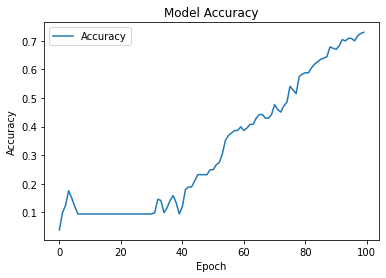

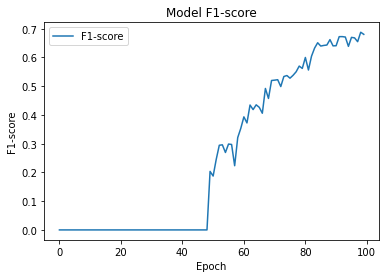

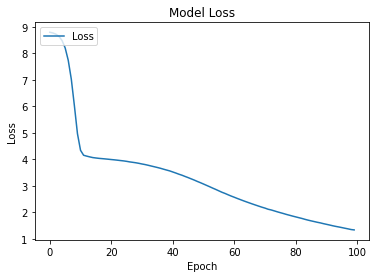

In [47]:


# plot accuracy
plt.plot(line.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation'], loc='upper left')
plt.show()



# plot f1

plt.plot(line.history['f1_score'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model F1-score')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend(['F1-score', 'Validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(line.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation'], loc='upper left')
plt.show()

#### ËÆìÊ®°ÂûãÁîüÂá∫Âè•Â≠êÁöÑ function

In [48]:
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = np.argmax(model.predict(encoded), axis=-1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

#### ËÆìÊ®°Âûã generate Âè•Â≠ê

In [49]:

print(generate_seq(model_line, tokenizer_line, max_length-1, 'ÊÇ≤ËßÄ', 10))


ÊÇ≤ËßÄ Â≠§ÂñÆ ÈÅ∫ÊÜæ ‰∏çÂ†™ ÊÑüÂòÜ Áñ≤ÂÄ¶ ËºæËΩâ Èõ£ÂÆâ ‰∏ªÈ°åÊõ≤ Âïä ÊîæÊÖ¢


## Reflection

ÊàëËÉΩË™™‰ªÄÈ∫ºÂë¢......ÂæûË®ìÁ∑¥ÈÅéÁ®ãÁöÑÂúñÔºàÁòãÁãÇÁ´ÑÂãïÔºåÁúãËµ∑‰æÜÈÇÑÊ≤íÊâæÂà∞ÂÆÉÊî∂ÊñÇÁöÑÈªûÔºâÂà∞ÁîüÊàêÁöÑÁµêÊûúÈÉΩÂæàÁ≥üÁ≥ï„ÄÇ‰∏çÁü•ÈÅìË©≤Ë™™ÂÆÉÂ≠∏ÂæóÂ•ΩÈÇÑÊòØ‰∏çÂ•ΩÔºåÊúâÂ§†Êï∑Ë°çÁöÑ copy and paste Ê≠åË©ûÔºåÈÇÑÁ©øÊèíÂ•áÊÄ™ÁöÑË©ûÈÄ≤Âéª......Â∞ç‰∫ÜÔºå‰∏çÁÆ°ÊòØ f-score ÈÇÑÊòØ accuracy ÈÉΩÊØî word-to-word model È´òÔºåloss ‰πü‰ΩéÂæàÂ§ö„ÄÇ
‰ΩÜÂÆÉÁúüÁöÑÂ•ΩÁàõÔºåÂóöÂóöÂóöÂóöÂóöÔΩûÔΩûÔΩûÔºàÂøÉÊÖãÂ¥©‰∫ÜÔºâ